In [1]:
%%javascript
function clear_other_cells () {
document.getElementById('file_menu').parentNode.style.display = 'none';
document.getElementById('logout').style.display = 'none';
document.getElementById('notebook_name').style.display = 'none';
var this_cell = $(element).closest('.cell').data('cell');
Jupyter.notebook.get_cells().forEach(function (cell) {
if (cell.cell_type === 'code' && cell !== this_cell) {
cell.clear_output();
}
Jupyter.notebook.set_dirty(true);
});
};
$([IPython.events]).on('notebook_loaded.Notebook', clear_other_cells());
$(window).on("beforeunload", function(){
Jupyter.notebook.kernel.restart();
});
$([IPython.events]).on('notebook_loaded.Notebook', function() {
Jupyter.notebook.set_autosave_interval(0);
});


<IPython.core.display.Javascript object>

<ul style="list-style-type:circle;font-size:14px;line-height:27px;">
    <li><b>from streamanalytix.python.dataset import Dataset:</b> Load Dataset class from streamanalytix API.</li>
	<li><b>Dataset(source_name):</b> Creates object of dataset class for given source.
		<ul>
			<li><b>Dataset.get_dataframe():</b> Read data source and return a pandas dataframe. </li>
		</ul>
	</li>
	<li><b>from streamanalytix.utilities import sax_utils:</b> Load sax_util script. It has following functions
		<ul>
			<li><b>sax_utils.save_and_download_model(model_name, model_object):</b>This method lets the user to save and download the trained model with StreamAnalytix. This model can than be used for training and/or scoring purpose as part of the StreamAnalytix pipeline</li>
				<ul>
					<li><b>model_name:</b> Name of the model. Accepted String value only. e.g. <i>"DecisionTreeModel"</i></li>
					<li><b>model_object:</b> Object of the trained model</li>
				</ul>
			<li><b>sax_utils.get_h2o_cluster_url(cluster_name):</b>This method lets the user to get h2o cluster url by providing cluster name</li>
				<ul>
					<li><b>cluster_name:</b> Name of the cluster. Accepted String value only. e.g. <i>"TrainingCluster"</i></li>
				</ul>
			<li><b>sax_utils.upload_and_register_h2o_model(model_object, model_name, model_type, project_name, project_version):</b>This method lets the user to upload and register h2o model in 'mojo' format in streamanalytix</li>
				<ul>
					<li><b>model_object:</b> Object of trained H2O model</li>
					<li><b>model_name:</b>Name of the model. Accepted String value only. e.g. <i>"H2OTreeModel"</i>
					<li><b>model_type:</b>Type of trained model. Accepted String value only. We support H2O model of types :<i>"DistributedRandomForest"</i>,<i>"GeneralizedLinearModelling"</i>,<i>"IsolationForest"</i>,<i>"GradientBoostingMachine"</i></li>
					<li><b>project_name:</b>Project Name in which model should register. Accepted String value only. e.g. <i>"MyProject"</i></li>
					<li><b>project_version:</b>Version of given project in which model should register</li>
				</ul>
		</ul>
	</li>
</ul>


In [10]:
from streamanalytix.python.dataset import Dataset
from streamanalytix.utilities import sax_utils


dataset_1 = Dataset("trainingMalware")
dataset_2 = Dataset("testingMalware")

# you can use pandas to create dataframe as shown below
train = dataset_1.get_dataframe()
test = dataset_2.get_dataframe()

Dataframe created
Dataframe created


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [11]:
print(train.shape, test.shape)


((9999, 83), (9999, 82))


Text(0.5,1,'HasDetections(target)')

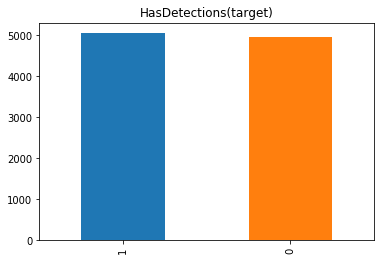

In [12]:
train['HasDetections'].value_counts().plot.bar()
plt.title('HasDetections(target)')

In [13]:
%%time
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

CPU times: user 162 ms, sys: 14.2 ms, total: 176 ms
Wall time: 175 ms


In [14]:
missing_train_data.head(50)


,Total,Percent
PuaMode,9996,99.969997
Census_ProcessorClass,9957,99.579958
DefaultBrowsersIdentifier,9527,95.279528
Census_IsFlightingInternal,8308,83.088309
Census_InternalBatteryType,7119,71.197120
Census_ThresholdOptIn,6371,63.716372
Census_IsWIMBootEnabled,6360,63.606361
SmartScreen,3603,36.033603
OrganizationIdentifier,3027,30.273027
SMode,609,6.090609


In [15]:
train_small = train # train.sample(frac=0.2).copy() # not small for now

In [17]:
print(train_small['DefaultBrowsersIdentifier'].dtypes)

float64


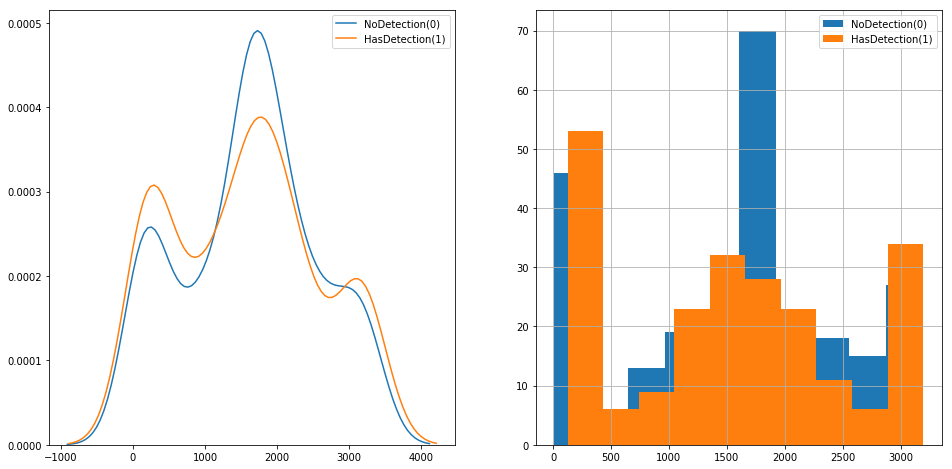

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(train_small.loc[train['HasDetections'] == 0, 'DefaultBrowsersIdentifier'], ax=ax[0], label='NoDetection(0)')
sns.kdeplot(train_small.loc[train['HasDetections'] == 1, 'DefaultBrowsersIdentifier'], ax=ax[0], label='HasDetection(1)')

train_small.loc[train['HasDetections'] == 0, 'DefaultBrowsersIdentifier'].hist(ax=ax[1])
train_small.loc[train['HasDetections'] == 1, 'DefaultBrowsersIdentifier'].hist(ax=ax[1])
ax[1].legend(['NoDetection(0)', 'HasDetection(1)'])

plt.show()

In [19]:
print(train_small['Census_IsFlightingInternal'].dtypes)

float64


/usr/lib/python2.7/site-packages/seaborn/distributions.py:290: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


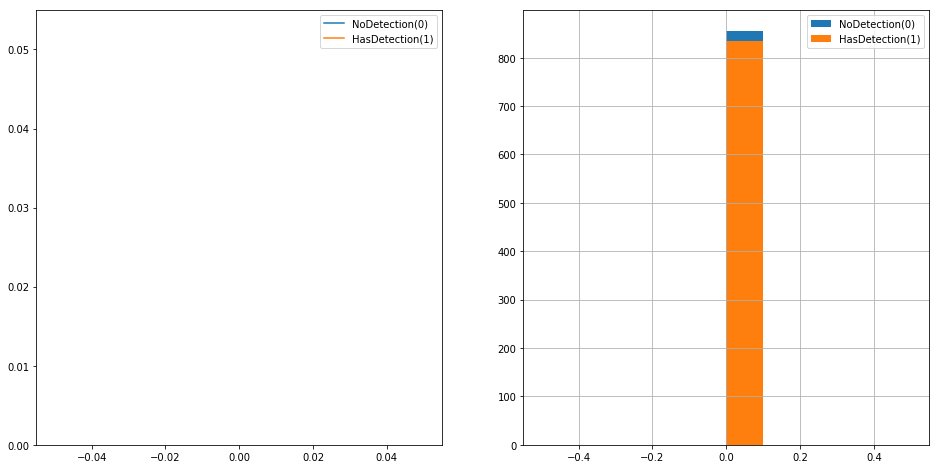

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(train_small.loc[train['HasDetections'] == 0, 'Census_IsFlightingInternal'], ax=ax[0], label='NoDetection(0)')
sns.kdeplot(train_small.loc[train['HasDetections'] == 1, 'Census_IsFlightingInternal'], ax=ax[0], label='HasDetection(1)')

train_small.loc[train['HasDetections'] == 0, 'Census_IsFlightingInternal'].hist(ax=ax[1])
train_small.loc[train['HasDetections'] == 1, 'Census_IsFlightingInternal'].hist(ax=ax[1])
ax[1].legend(['NoDetection(0)', 'HasDetection(1)'])

plt.show()

In [21]:
categorical_features = [
        'ProductName',                                          
        'EngineVersion',                                        
        'AppVersion',                                           
        'AvSigVersion',                                         
        'Platform',                                             
        'Processor',                                            
        'OsVer',                                                
        'OsPlatformSubRelease',                                 
        'OsBuildLab',                                           
        'SkuEdition',                                           
        'SmartScreen',                                          
        'Census_MDC2FormFactor',                                
        'Census_DeviceFamily',                                  
        'Census_PrimaryDiskTypeName',                           
        'Census_ChassisTypeName',                               
        'Census_PowerPlatformRoleName',                         
        'Census_OSVersion',                                     
        'Census_OSArchitecture',                                
        'Census_OSBranch',                                      
        'Census_OSEdition',                                     
        'Census_OSSkuName',                                     
        'Census_OSInstallTypeName',                             
        'Census_OSWUAutoUpdateOptionsName',                     
        'Census_GenuineStateName',                              
        'Census_ActivationChannel',                             
        'Census_FlightRing',                                    
]


In [22]:
def plot_category_percent_of_target(col):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    cat_percent = train_small[[col, 'HasDetections']].groupby(col, as_index=False).mean()
    cat_size = train_small[col].value_counts().reset_index(drop=False)
    cat_size.columns = [col, 'count']
    cat_percent = cat_percent.merge(cat_size, on=col, how='left')
    cat_percent['HasDetections'] = cat_percent['HasDetections'].fillna(0)
    cat_percent = cat_percent.sort_values(by='count', ascending=False)[:20]
    sns.barplot(ax=ax, x='HasDetections', y=col, data=cat_percent, order=cat_percent[col])

    for i, p in enumerate(ax.patches):
        ax.annotate('{}'.format(cat_percent['count'].values[i]), (p.get_width(), p.get_y()+0.5), fontsize=20)

    plt.xlabel('% of HasDetections(target)')
    plt.ylabel(col)
    plt.show()
